In [1]:
import os
import glob 

In [2]:
#Location of all the train text files
path = r"C:\Users\Gowtham\Desktop\Work\Workbench\Projects\Amazon - ML\Dataset\dataset\train"
os.chdir(path)
import pandas as pd

### Read a text file and preparing data for dataframe Creation

In [3]:
 def read_text_file(file_path):
    with open(file_path, 'r') as f:
        string = f.read()
        #splitting line by line
        string = string.splitlines()
        lst = []
        for t in string :
            line = t.split() #splitting words from each line
            if line[1] == '(min)' or line[1] == 'conditions' :
                    lst.append(line[2])
            else:
                lst.append(line[1])
                
        del lst[-1] #deleting a unnecessary value 
        return lst # returning the list containing values only to create a data frame
        print("\t")

In [4]:
count = 1 
final_list = []
for file in sorted(os.listdir(path)):
    # Check whether file is in text format or not
    if count == 5000: #number of files to process initally 
        count = 1 
        break
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        
#         call read text file function
        final_list.append(read_text_file(file_path))
    count = count + 1 
    
    
df = pd.DataFrame(final_list, columns=['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date', 'Time_Orderd', 'Time_Order_picked','Weather conditions','Road_traffic_density','Vehicle_condition', 'Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City','Time_taken (min)'])

### Obtained dataframe from 5000 train text files

In [5]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
2,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
3,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
4,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0x8bf2,RANCHIRES12DEL02,30.00,3.70,0.00,0.00,0.08,0.08,06-04-2022,22:25,22:40,Fog,Low,1,Drinks,scooter,0.00,No,Urban,35.00
4995,0x5517,MYSRES02DEL01,24.000000,4.800000,12.304569,76.643622,12.344569,76.683622,24-03-2022,12:55,13:05,Sandstorms,High,2,Buffet,scooter,1.000000,No,Metropolitian,20.000000
4996,0xc7c1,KOLRES06DEL03,26.000000,5.000000,22.533662,88.366217,22.563662,88.396217,13-02-2022,22:30,22:40,Sunny,Low,1,Buffet,motorcycle,0.000000,No,Metropolitian,19.000000
4997,0x6a6c,HYDRES13DEL01,22.000000,4.600000,17.431477,78.400350,17.471477,78.440350,26-03-2022,13:10,13:20,Sandstorms,High,1,Buffet,scooter,0.000000,No,Metropolitian,21.000000


In [6]:
# df.sort_values(by ='Delivery_person_Age', ascending = 1).head(20)
df.describe()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
count,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999
unique,4999,1166,58,52,436,409,2607,2607,44,177,193,7,5,4,4,4,13,3,4,113
top,0x4607,COIMBRES06DEL01,25.000000,4.800000,0.00,0.00,0.08,0.08,28-03-2022,NaN,22:40,Fog,Low,0,Meal,motorcycle,1.000000,No,Metropolitian,29.000000
freq,1,16,245,728,414,419,49,49,142,197,62,858,1702,1666,1285,2932,2823,4866,3740,221


In [7]:
#Checking Default Datatypes
df.dtypes

ID                             object
Delivery_person_ID             object
Delivery_person_Age            object
Delivery_person_Ratings        object
Restaurant_latitude            object
Restaurant_longitude           object
Delivery_location_latitude     object
Delivery_location_longitude    object
Order_Date                     object
Time_Orderd                    object
Time_Order_picked              object
Weather conditions             object
Road_traffic_density           object
Vehicle_condition              object
Type_of_order                  object
Type_of_vehicle                object
multiple_deliveries            object
Festival                       object
City                           object
Time_taken (min)               object
dtype: object

In [8]:
#Saving the dataframe before working on df
Original_Dataframe = df
Original_Dataframe

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
2,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
3,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
4,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0x8bf2,RANCHIRES12DEL02,30.00,3.70,0.00,0.00,0.08,0.08,06-04-2022,22:25,22:40,Fog,Low,1,Drinks,scooter,0.00,No,Urban,35.00
4995,0x5517,MYSRES02DEL01,24.000000,4.800000,12.304569,76.643622,12.344569,76.683622,24-03-2022,12:55,13:05,Sandstorms,High,2,Buffet,scooter,1.000000,No,Metropolitian,20.000000
4996,0xc7c1,KOLRES06DEL03,26.000000,5.000000,22.533662,88.366217,22.563662,88.396217,13-02-2022,22:30,22:40,Sunny,Low,1,Buffet,motorcycle,0.000000,No,Metropolitian,19.000000
4997,0x6a6c,HYDRES13DEL01,22.000000,4.600000,17.431477,78.400350,17.471477,78.440350,26-03-2022,13:10,13:20,Sandstorms,High,1,Buffet,scooter,0.000000,No,Metropolitian,21.000000


In [9]:
#Converting int type data types to numberic to make calculations
df['Time_taken (min)'] = df['Time_taken (min)'].astype(float)
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)

df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [10]:
#Checking if the datatypes are all changed 
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude             object
Restaurant_longitude            object
Delivery_location_latitude      object
Delivery_location_longitude     object
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather conditions              object
Road_traffic_density            object
Vehicle_condition               object
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken (min)               float64
dtype: object

In [11]:
#5000 samples  from Population describing info on time taken to deliver a product 
df['Time_taken (min)'].describe()

count    4999.000000
mean       26.291058
std         9.415528
min        10.000000
25%        19.000000
50%        26.000000
75%        32.000000
max        54.000000
Name: Time_taken (min), dtype: float64

In [12]:
#5000 samples  from Population describing info on ages of the delivery person
df['Delivery_person_Age'].describe()

count    4791.000000
mean       29.471927
std         5.789198
min        15.000000
25%        25.000000
50%        29.000000
75%        34.000000
max        50.000000
Name: Delivery_person_Age, dtype: float64

In [13]:
#5000 samples  from Population describing info on ages of the delivery person ratings
df['Delivery_person_Ratings'].describe()

count    4785.000000
mean        4.632414
std         0.327898
min         1.000000
25%         4.500000
50%         4.700000
75%         4.800000
max         6.000000
Name: Delivery_person_Ratings, dtype: float64

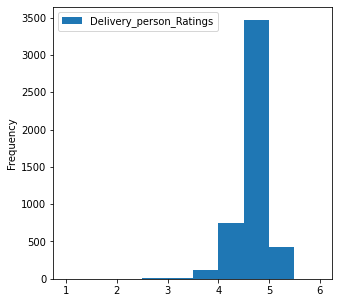

In [42]:
#Analysing Comparative results 
import matplotlib.pyplot as mp
df.plot(y="Delivery_person_Ratings", kind="hist", figsize=(5, 5))
mp.show()

#We could conclude max customers give ratings b/w 4.5 to 5

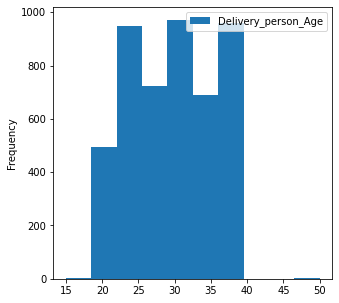

In [43]:
import matplotlib.pyplot as mp
df.plot(y="Delivery_person_Age", kind="hist", figsize=(5, 5))
mp.show()

#We could conclude max Delivery person age relies b/w 20 to 40
#Very less people work in delivery person in the ranges of 45 to 50

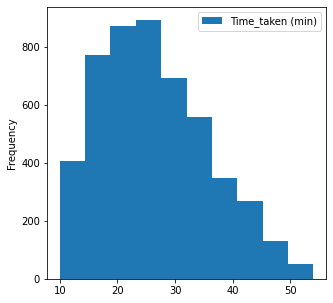

In [47]:
import matplotlib.pyplot as mp
df.plot(y="Time_taken (min)", kind="hist", figsize=(5, 5))
mp.show()

#Average time taken to deliver is 25 to 35 mins 
#Lowest is as low as 10
#Highest is as hight as 50

In [53]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken (min)
count,4791.000000,4785.000000,4999.000000
mean,29.471927,4.632414,26.291058
std,5.789198,0.327898,9.415528
min,15.000000,1.000000,10.000000
25%,25.000000,4.500000,19.000000
50%,29.000000,4.700000,26.000000
75%,34.000000,4.800000,32.000000
max,50.000000,6.000000,54.000000


### Future Analytic Plans 
<b>Q1. Given the delivery partner ID 
    
 1. Delivery Performance based on ratings and delivery time ? 
 2. Average working hours and most active hours ? 
 3. Which restaurnt this person mostly picks orders from ? 
 4. How far this delivery partner is ready to Go ? 
 5. Most visited and familiar places ? 
 6. Which place he starts first and ends everyday -> this will probably be his home so he might be more familiar with the places     in that area. 
 7. Successful Deliveries Failed Deliveries. 
 8. How much time might this person take to deliver this given order ? 

<b>Q2. Given the Restaurant ID  

    1.Restaurant Orders received based on timings  
    2.Restaurant time taken to prepare the order based on type of the food
    3.Restaurant Peak time 
    4.Most Visited delivery Partners
    5.Restaurant food ratings
    6.Restaurant most ordered food
    7.Restaurant average working time 
    8.How is the growth of orders in this particular restaurant. 

    
<i>Given the time  -> Updating Soon
    
<i>Given the traffic condition -> Updating Soon
    
<b>Updating More information in upcoming days